In [13]:
# Importing Libraries
import praw
import csv
from datetime import datetime
import os
from tqdm import tqdm
import time
import importlib  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import unicodedata
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from translatepy import Translator
from wordcloud import WordCloud
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Patch
import sys  
import nltk 

In [16]:
# Check versions
print("Library Versions:")
print("=" * 50)
print(f"Python: {sys.version}")
print("=" * 50)
print(f"praw: {praw.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"torch: {torch.__version__}")
print(f"transformers: {importlib.import_module('transformers').__version__}")
print(f"scikit-learn: {importlib.import_module('sklearn').__version__}")
print(f"emoji: {emoji.__version__}")
print(f"nltk: {nltk.__version__}")

Library Versions:
Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
praw: 7.8.1
pandas: 2.2.3
numpy: 2.1.3
matplotlib: 3.10.0
seaborn: 0.13.2
torch: 2.8.0+cpu
transformers: 4.49.0
scikit-learn: 1.6.1
emoji: 2.14.1
nltk: 3.9.1


### Data Extraction

In [2]:
# # Filling reddit api credentials 
# client_id = 'QL8pAnDmsWBGG4Mr3JBmUQ'
# client_secret = 'gE-FO4x_vE4W90JuN-jfYC2SumC_0A'
# user_agent = 'mental_health_project by /u/your_reddit_username'

# # Initializing Reddit API
# reddit = praw.Reddit(client_id=client_id,
#                      client_secret=client_secret,
#                      user_agent=user_agent)

# # Setting output file and folder 
# current_dir = os.getcwd()  # Compatible with Jupyter and scripts
# output_dir = os.path.join(current_dir, 'output')
# os.makedirs(output_dir, exist_ok=True)
# output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Function to extract reddit data by passing sub reddit and limit as parameters
# def extract_reddit_data(subreddit_name, limit=500):
#     subreddit = reddit.subreddit(subreddit_name)
#     data = []
#     post_count = 0

#     print(f"\n Extracting up to {limit} posts from r/{subreddit_name}...")
#     for post in tqdm(subreddit.new(limit=limit), desc=f"Posts r/{subreddit_name}"):
#         post_count += 1
#         data.append([
#             "post", post.id, "", str(post.author),
#             datetime.utcfromtimestamp(post.created_utc).isoformat(),
#             post.score, post.title, post.selftext,
#             post.subreddit.display_name,
#             post.link_flair_text, post.url, "",
#             post.upvote_ratio,
#             post.ups,       # Upvotes count
#             post.downs      # Downvotes count
#         ])

#         time.sleep(1.5) # adding delay

#         post.comments.replace_more(limit=0)
#         for comment in post.comments.list():
#             data.append([
#                 "comment", post.id, comment.id, str(comment.author),
#                 datetime.utcfromtimestamp(comment.created_utc).isoformat(),
#                 comment.score, "", comment.body,
#                 post.subreddit.display_name,
#                 "", "", comment.parent_id,
#                 "",            # no upvote_ratio for comments
#                 comment.ups,   # Upvotes count
#                 comment.downs  # Downvotes count
#             ])

#     return data, post_count

# Function to save to csv file
# def save_to_csv(data, filename):
#     with open(filename, mode='w', encoding='utf-8', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow([
#             "type", "post_id", "comment_id", "author", "created_utc", "score",
#             "title", "text", "subreddit", "flair", "url", "parent_id",
#             "upvote_ratio", "upvotes", "downvotes"
#         ])
#         writer.writerows(data)
#     print(f"\n Data saved to: {filename}")

# # Main script logic
# total_posts_needed = 10000
# subreddits = [
#     'depression', 'anxiety', 'mentalhealth', 'SuicideWatch', 'depression_help',
#     'offmychest', 'TrueOffMyChest', 'confession', 'lonely', 'socialanxiety',
#     'BPD', 'ADHD', 'PTSD', 'OCD', 'decidingtobebetter',
#     'KindVoice', 'therapy', 'CPTSD'
# ]

# num_subs = len(subreddits)
# chunk_limit = total_posts_needed // num_subs

# total_posts_collected = 0
# all_data = []

# for sub in subreddits:
#     if total_posts_collected >= total_posts_needed:
#         break

#     remaining = total_posts_needed - total_posts_collected
#     limit_for_sub = min(chunk_limit, remaining)

#     sub_data, posts_fetched = extract_reddit_data(sub, limit=limit_for_sub)
#     all_data.extend(sub_data)
#     total_posts_collected += posts_fetched

#     print(f" Collected {total_posts_collected} posts so far...")

# # Saving final dataset
# save_to_csv(all_data, output_file)

**Seperating comments and posts from whole dataset**

In [5]:
# # Getting current working directory
# current_dir = os.getcwd()

# # Defining path to 'output' folder
# output_dir = os.path.join(current_dir, 'output')

# # Defining file paths
# input_file = os.path.join(output_dir, 'reddit_mentalhealth_processed.csv')

# # Reading the CSV
# df = pd.read_csv(input_file)

# # Filter rows where type = 'post'
# post = df[df['type'] == 'post']

# # Save filtered DataFrame to a new CSV
# post_file = os.path.join(output_dir, 'reddit_posts_only.csv')
# post.to_csv(post_file, index=False)

# print(f"Saved {len(post)} rows to {post_file}")

In [6]:
# # Getting current working directory
# current_dir = os.getcwd()
# original_dir = current_dir

# # Defining path to 'output' folder
# output_dir = os.path.join(current_dir, 'output')

# # Defining full path to the CSV file
# input_file = os.path.join(output_dir, 'reddit_posts_only.csv')
# output_file = os.path.join(output_dir, 'pre_processed_data_full_sentence.csv')

### Data Preprocessing

In [7]:
# # Enable tqdm for pandas apply
# tqdm.pandas()

# # ======================
# # Setup
# # ======================
# EMOTION_MAP = {
#     # 😢 Sad / Negative / Depressed
#     "😭": "crying",
#     "💔": "broken_heart",
#     "😔": "sad",
#     "😢": "tears",
#     "😞": "disappointed",
#     "😓": "anxious",
#     "😟": "worried",
#     "🙁": "unhappy",
#     "😩": "exhausted",
#     "😫": "tired",
#     "😖": "frustrated",
#     "😣": "distressed",
#     "🥺": "pleading",
#     "😿": "crying_cat",
#     "☹️": "frowning",
    
#     # 🙂 Neutral / Thinking
#     "😐": "neutral",
#     "🤔": "thinking",
#     "🙄": "eye_roll",
    
#     # 😀 Happy / Positive (less emphasized)
#     "😂": "laughing",
#     "😁": "grinning",
#     "😊": "happy",
#     "😍": "love",
#     "❤": "love",
#     "🤗": "hugging",
#     "🎉": "celebration"
# }

# stop_words = set(stopwords.words('english'))
# translator = Translator()

# # ======================
# # Helper Functions
# # ======================
# def expand_contractions(text):
#     return contractions.fix(text)

# def handle_special_characters(text):
#     text = str(text)
#     text = re.sub(r'[\u200b-\u200f\u202a-\u202e]', '', text)  # invisible chars
#     text = re.sub(r'[❤♡♥]', 'heart', text)
#     text = re.sub(r'[★☆✮✯]', 'star', text)
#     text = unicodedata.normalize('NFKD', text)
#     return text.encode('ascii', 'ignore').decode('ascii')

# def replace_emojis(text):
#     for emoji_char, label in EMOTION_MAP.items():
#         text = text.replace(emoji_char, label)
#     return text

# def translate_to_english(text):
#     try:
#         if not text.strip():
#             return text
#         result = translator.translate(text, "English")
#         translated_text = result.result
#         if translated_text.strip().lower() == text.strip().lower():
#             return text
#         else:
#             return translated_text
#     except Exception:
#         return text

# # ======================
# # Main Preprocessing Function
# # ======================
# def preprocess_text(raw_text: str) -> str:
#     text = str(raw_text).strip()
    
#     # 1. Replace emojis first
#     text = replace_emojis(text)
    
#     # 2. Translate, expand, and handle special chars
#     text = text.lower()
#     text = translate_to_english(text)
#     text = expand_contractions(text)
#     text = handle_special_characters(text)
    
#     # 3. Remove punctuation EXCEPT full stops
#     text = re.sub(r"[^\w\s\.]", " ", text)
    
#     # 4. Tokenize and remove stopwords (full stops stay)
#     tokens = []
#     for t in text.split():
#         if t not in stop_words:
#             tokens.append(t)
    
#     return " ".join(tokens)

# # ======================
# # Load Data
# # ======================
# try:
#     df = pd.read_csv(input_file)
# except Exception as e:
#     print(f"Error loading data: {e}")
#     exit()

# df['title'] = df['title'].astype(str).str.strip()
# df['text'] = df['text'].astype(str).str.strip()

# # Remove empty rows
# df = df[~((df['title'] == '') & (df['text'] == ''))]

# # Remove deleted/removed posts
# df = df[~df['text'].str.lower().isin(['removed', 'deleted'])]

# # *** IMPORTANT: NO TRUNCATION NOW ***
# # df['text'] = df['text'].apply(lambda x: ' '.join(x.split()[:400]))  # REMOVED

# # Apply clean_text with progress bar
# df['title'] = df['title'].progress_apply(preprocess_text)
# df['text'] = df['text'].progress_apply(preprocess_text)

# # Merge title and text
# df['processed_text'] = df['title'] + " " + df['text']

# df = df[df['processed_text'].str.strip() != '']

# # ======================
# # 3. SAVE OUTPUT
# # ======================
# try:
#     df.to_csv(output_file, index=False)
#     print("Cleaned data saved successfully to:", output_file)
# except Exception as e:
#     print(f"Error saving file: {e}")


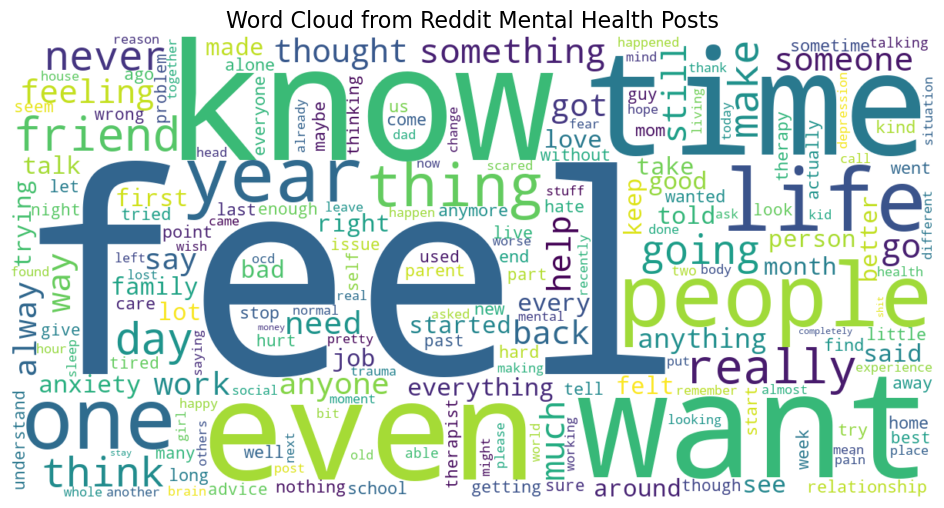

In [10]:
df = pd.read_csv("output/pre_processed_data_full_sentence.csv") 

all_text = ' '.join(df['processed_text'].astype(str).tolist())

# Step 6: Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

# Step 7: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reddit Mental Health Posts', fontsize=16)
plt.show()

### Calculation Severity

In [7]:
# # ============================
# # Load Sentiment Model
# # ============================
# model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

# labels = ['Negative', 'Neutral', 'Positive']


# def get_sentiment(text):
#     encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
#     output = model(**encoded_input)
#     scores = output.logits.detach().numpy()[0]
#     probs = np.exp(scores) / np.exp(scores).sum()
#     return dict(zip(labels, probs))


# # ============================
# # Sentence Splitter (full stops)
# # ============================
# def split_into_sentences(text):
#     text = text.strip()
#     sentences = re.split(r'\.\s+', text)
#     sentences = [s.strip() for s in sentences if s.strip()]
#     return sentences


# # ============================
# # Valence & Arousal Mapping
# # ============================
# valence_map = {
#     'Positive': 1.0,
#     'Neutral': 0.0,
#     'Negative': -1.0
# }

# arousal_map = {
#     'Positive': 0.7,
#     'Neutral': 0.5,
#     'Negative': 0.8
# }


# # ============================
# # Sentence-level computation
# # ============================
# def analyze_post_sentence_level(text):
#     sentences = split_into_sentences(text)
    
#     sent_data = []
    
#     for s in sentences:
#         sentiment = get_sentiment(s)
        
#         valence = (
#             sentiment['Positive'] * valence_map['Positive'] +
#             sentiment['Neutral']  * valence_map['Neutral'] +
#             sentiment['Negative'] * valence_map['Negative']
#         )
        
#         arousal = (
#             sentiment['Positive'] * arousal_map['Positive'] +
#             sentiment['Neutral']  * arousal_map['Neutral'] +
#             sentiment['Negative'] * arousal_map['Negative']
#         )
        
#         severity = -valence * arousal
        
#         sent_data.append({
#             "sentence": s,
#             "Positive": sentiment['Positive'],
#             "Neutral": sentiment['Neutral'],
#             "Negative": sentiment['Negative'],
#             "valence": valence,
#             "arousal": arousal,
#             "severity": severity
#         })
    
#     sent_df = pd.DataFrame(sent_data)
    
#     final_valence = sent_df['valence'].mean()
#     final_arousal = sent_df['arousal'].mean()
#     final_severity_raw = sent_df['severity'].mean()
    
#     return sent_df, final_valence, final_arousal, final_severity_raw


# # ============================
# # Load your preprocessed file
# # ============================
# output_dir = os.path.join(original_dir, 'output')
# input_file = os.path.join(output_dir, 'pre_processed_data_full_sentence.csv')

# df = pd.read_csv(input_file)


# # ============================
# # Process each post with progress bar
# # ============================
# all_results = []

# print("\n🔄 Processing posts sentence-by-sentence...\n")

# for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing posts"):
#     text = row['processed_text']
    
#     sentence_df, val, aro, sev_raw = analyze_post_sentence_level(text)
    
#     all_results.append({
#         "processed_text": text,
#         "avg_valence": val,
#         "avg_arousal": aro,
#         "raw_severity": sev_raw,
#         "sentence_details": sentence_df.to_dict(orient="records")
#     })


# result_df = pd.DataFrame(all_results)

# # Normalize severity 0–1
# scaler = MinMaxScaler()
# result_df["severity"] = scaler.fit_transform(result_df[["raw_severity"]])


# # ============================
# # Save Output
# # ============================
# output_file = os.path.join(output_dir, 'reddit_sentence_level_valence_arousal_severity.csv')
# result_df.to_csv(output_file, index=False)

# print("\nSentence-level processing complete!")
# print(f"Results saved to: {output_file}\n")
# print(result_df.head())



🔄 Processing posts sentence-by-sentence...



Processing posts: 100%|██████████| 9990/9990 [4:18:37<00:00,  1.55s/it]   



Sentence-level processing complete!
Results saved to: C:\Users\praja\Downloads\UOA_FYP\FYP\Final_project_code\output\reddit_sentence_level_valence_arousal_severity.csv

                                      processed_text  avg_valence  \
0  life quite expected hello dark place last 2 ye...    -0.065946   
1  cannot things right literally nothing ever go ...    -0.605782   
2  anything life becoming depressing listen serio...    -0.541485   
3  feeling really alone need someone kind talk ca...     0.303884   
4  numb cw vent kind new still figuring functions...    -0.411917   

   avg_arousal  raw_severity  \
0     0.625992      0.054458   
1     0.737223      0.470073   
2     0.699213      0.400956   
3     0.630236     -0.200598   
4     0.671656      0.304311   

                                    sentence_details  severity  
0  [{'sentence': 'life quite expected hello dark ...  0.503754  
1  [{'sentence': 'cannot things right literally n...  0.788120  
2  [{'sentence': 'anything 

### Analysis

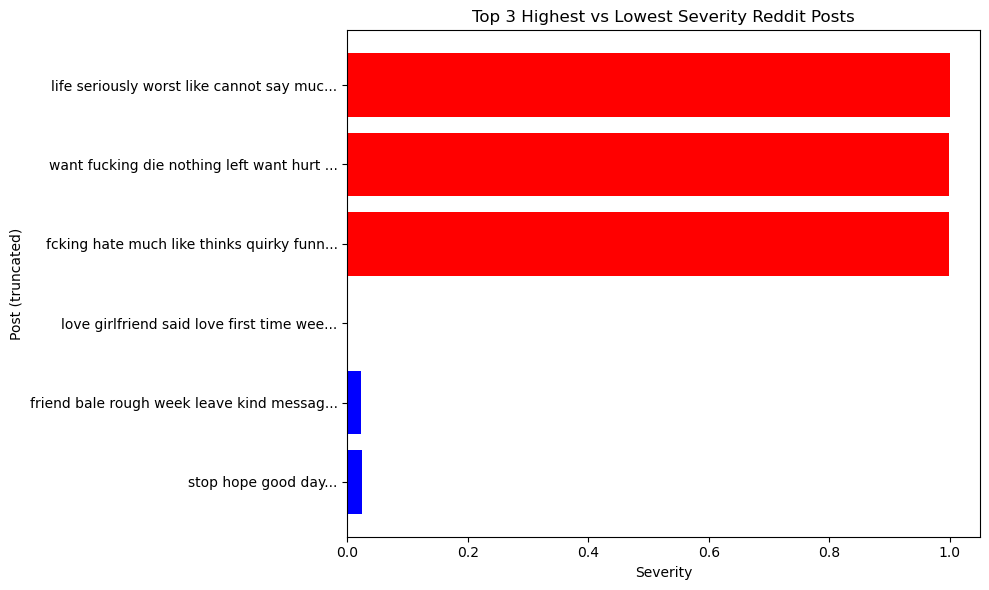

In [9]:
input_file = os.path.join(output_dir, 'reddit_sentence_level_valence_arousal_severity.csv')

df = pd.read_csv(input_file)
# Get top 3 highest and lowest severity
top3 = df.sort_values(by='severity', ascending=False).head(3)
bottom3 = df.sort_values(by='severity', ascending=True).head(3)

# Combine for plotting
combined = pd.concat([top3, bottom3])
combined = combined[['processed_text', 'severity']]

# Shorten text for readability
combined['short_text'] = combined['processed_text'].str.slice(0, 40) + "..."

# Plot
plt.figure(figsize=(10,6))
plt.barh(combined['short_text'], combined['severity'], color=['red' if x in top3['severity'].values else 'blue' for x in combined['severity']])
plt.xlabel("Severity")
plt.ylabel("Post (truncated)")
plt.title("Top 3 Highest vs Lowest Severity Reddit Posts")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

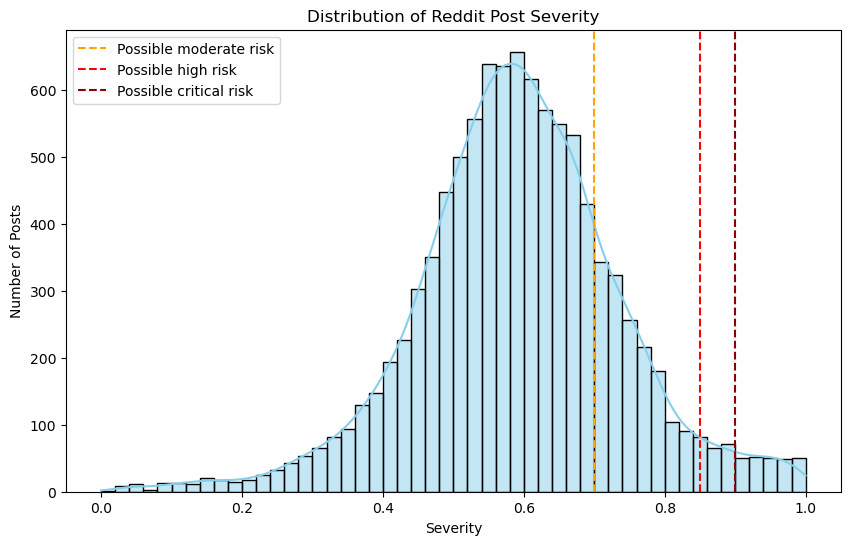

In [10]:
# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['severity'], bins=50, kde=True, color='skyblue')
plt.xlabel("Severity")
plt.ylabel("Number of Posts")
plt.title("Distribution of Reddit Post Severity")
plt.axvline(0.7, color='orange', linestyle='--', label='Possible moderate risk')
plt.axvline(0.85, color='red', linestyle='--', label='Possible high risk')
plt.axvline(0.9, color='darkred', linestyle='--', label='Possible critical risk')
plt.legend()
plt.show()


In [11]:
# Compute key percentiles
p50 = np.percentile(df['severity'], 50)  # median
p75 = np.percentile(df['severity'], 75)  # top 25%
p90 = np.percentile(df['severity'], 90)  # top 10%
p95 = np.percentile(df['severity'], 95)  # top 5%

print(f"Median severity: {p50:.2f}")
print(f"75th percentile: {p75:.2f}")
print(f"90th percentile: {p90:.2f}")
print(f"95th percentile: {p95:.2f}")


Median severity: 0.59
75th percentile: 0.68
90th percentile: 0.76
95th percentile: 0.83


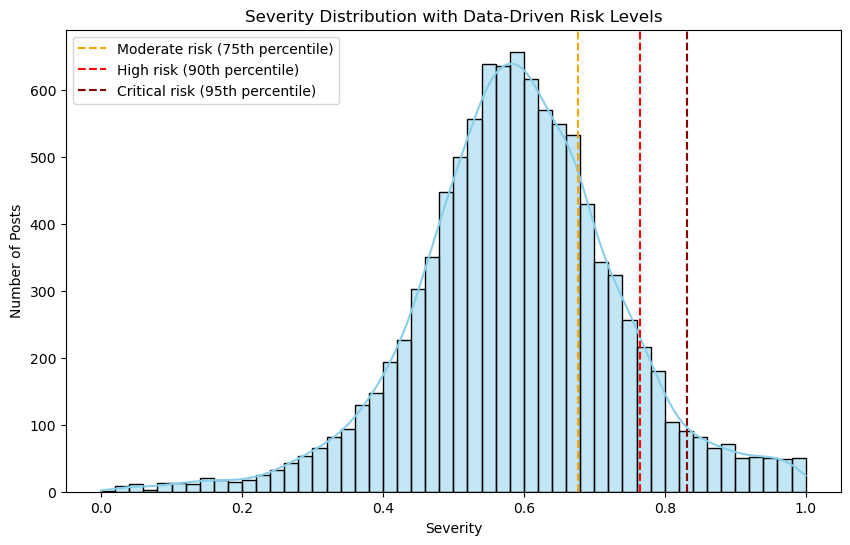

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['severity'], bins=50, kde=True, color='skyblue')

# Add data-driven thresholds
plt.axvline(p75, color='orange', linestyle='--', label='Moderate risk (75th percentile)')
plt.axvline(p90, color='red', linestyle='--', label='High risk (90th percentile)')
plt.axvline(p95, color='darkred', linestyle='--', label='Critical risk (95th percentile)')

plt.xlabel("Severity")
plt.ylabel("Number of Posts")
plt.title("Severity Distribution with Data-Driven Risk Levels")
plt.legend()
plt.show()


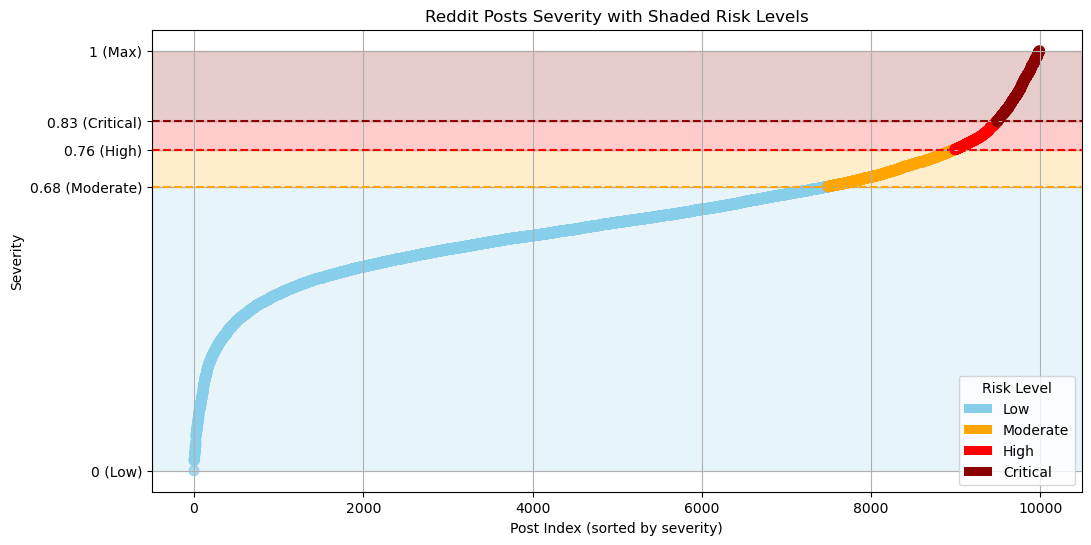

In [13]:
# Load CSV
df = pd.read_csv("output/reddit_sentence_level_valence_arousal_severity.csv")

# Compute percentiles for thresholds
p75 = np.percentile(df['severity'], 75)  # Moderate
p90 = np.percentile(df['severity'], 90)  # High
p95 = np.percentile(df['severity'], 95)  # Critical

# Assign risk levels
def assign_risk(sev):
    if sev <= p75:
        return "Low"
    elif sev <= p90:
        return "Moderate"
    elif sev <= p95:
        return "High"
    else:
        return "Critical"

df['risk_level'] = df['severity'].apply(assign_risk)

# Save CSV with risk_level column
output_file = "output/reddit_with_valence_arousal_severity_with_risk.csv"
df.to_csv(output_file, index=False)

# Sort by severity
df_sorted = df.sort_values(by='severity').reset_index(drop=True)

# Map colors
color_map = {
    "Low": "skyblue",
    "Moderate": "orange",
    "High": "red",
    "Critical": "darkred"
}
colors = df_sorted['risk_level'].map(color_map)

# Plot
plt.figure(figsize=(12,6))

# Background shading for risk levels
plt.axhspan(0, p75, color='skyblue', alpha=0.2)
plt.axhspan(p75, p90, color='orange', alpha=0.2)
plt.axhspan(p90, p95, color='red', alpha=0.2)
plt.axhspan(p95, 1, color='darkred', alpha=0.2)

# Scatter plot of posts
plt.scatter(df_sorted.index, df_sorted['severity'], c=colors, s=50, alpha=0.7)

# Add horizontal lines for thresholds
plt.axhline(p75, color='orange', linestyle='--')
plt.axhline(p90, color='red', linestyle='--')
plt.axhline(p95, color='darkred', linestyle='--')

# Customize y-axis ticks with threshold values
ticks = sorted(list(set([0, p75, p90, p95, 1])))
labels = ['0 (Low)', f'{p75:.2f} (Moderate)', f'{p90:.2f} (High)', f'{p95:.2f} (Critical)', '1 (Max)']
plt.yticks(ticks, labels)

# Legend
legend_elements = [Patch(facecolor=color_map[r], label=r) for r in color_map]
plt.legend(handles=legend_elements, title="Risk Level")

plt.xlabel("Post Index (sorted by severity)")
plt.ylabel("Severity")
plt.title("Reddit Posts Severity with Shaded Risk Levels")
plt.grid(True)
plt.show()


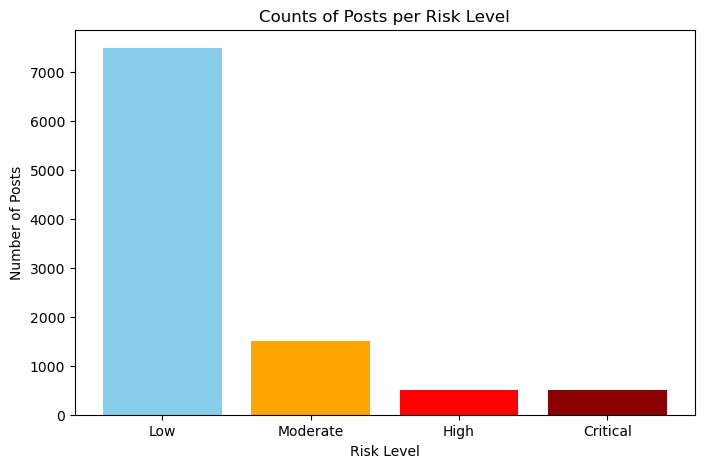

In [14]:
# Bar chart of risk counts
plt.figure(figsize=(8,5))
risk_counts = df['risk_level'].value_counts().reindex(["Low","Moderate","High","Critical"])
colors = ["skyblue","orange","red","darkred"]

plt.bar(risk_counts.index, risk_counts.values, color=colors)
plt.xlabel("Risk Level")
plt.ylabel("Number of Posts")
plt.title("Counts of Posts per Risk Level")
plt.show()


Correlation matrix:
                     valence  avg_valence   arousal  avg_arousal  \
valence             1.000000     0.999533 -0.721248    -0.722660   
avg_valence         0.999533     1.000000 -0.720033    -0.722528   
arousal            -0.721248    -0.720033  1.000000     0.998984   
avg_arousal        -0.722660    -0.722528  0.998984     1.000000   
raw_severity_whole -0.996481    -0.995821  0.758374     0.759292   
raw_severity       -0.996086    -0.996474  0.757491     0.759692   

                    raw_severity_whole  raw_severity  
valence                      -0.996481     -0.996086  
avg_valence                  -0.995821     -0.996474  
arousal                       0.758374      0.757491  
avg_arousal                   0.759292      0.759692  
raw_severity_whole            1.000000      0.999401  
raw_severity                  0.999401      1.000000  


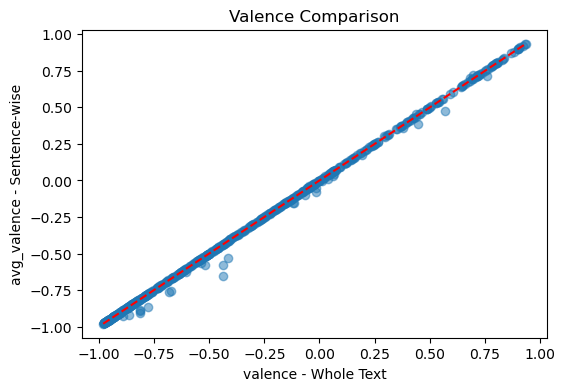

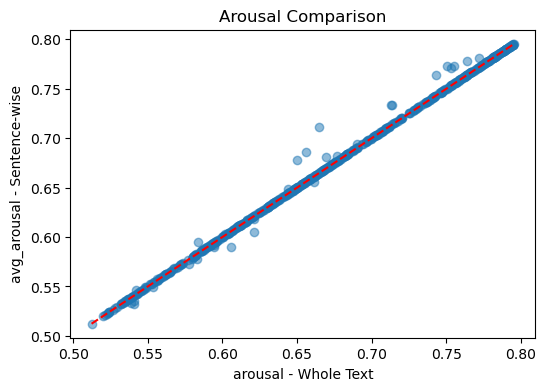

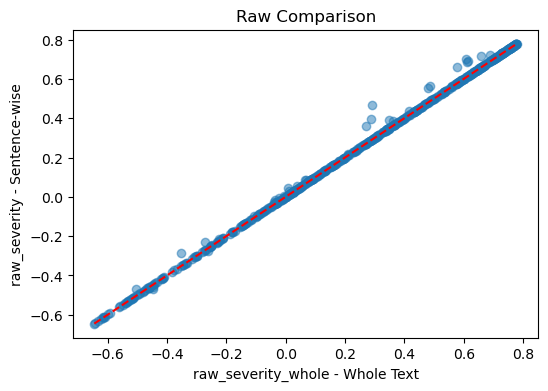

Standard deviation comparison:
Whole-text:
valence               0.534823
arousal               0.079775
raw_severity_whole    0.387067
dtype: float64
Sentence-wise:
avg_valence     0.535470
avg_arousal     0.080126
raw_severity    0.387766
dtype: float64

Recommendation:
If sentence-wise std is higher, it captures more nuance and is generally better for downstream analysis.


In [23]:
# -------------------------
# 1. Load CSVs
# -------------------------
whole_df = pd.read_csv("output/reddit_with_valence_arousal_severity.csv")        # whole-text CSV
sentence_df = pd.read_csv("output/reddit_sentence_level_valence_arousal_severity.csv")  # sentence-wise CSV

# -------------------------
# 2. Merge on processed_text (or post_id if available)
# -------------------------
# Assuming processed_text is unique per post
df = whole_df.merge(sentence_df, on="processed_text", suffixes=("_whole", "_sentence"))

# -------------------------
# 3. Correlation
# -------------------------
correlations = df[["valence", "avg_valence", 
                   "arousal", "avg_arousal", 
                   "raw_severity_whole", "raw_severity"]].corr()

print("Correlation matrix:")
print(correlations)

# -------------------------
# 4. Scatterplots
# -------------------------
metrics = [("valence", "avg_valence"), 
           ("arousal", "avg_arousal"), 
           ("raw_severity_whole", "raw_severity")]

for whole_col, sentence_col in metrics:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[whole_col], df[sentence_col], alpha=0.5)
    plt.plot([df[whole_col].min(), df[whole_col].max()],
             [df[whole_col].min(), df[whole_col].max()],
             color="red", linestyle="--")
    plt.xlabel(f"{whole_col} - Whole Text")
    plt.ylabel(f"{sentence_col} - Sentence-wise")
    plt.title(f"{whole_col.split('_')[0].capitalize()} Comparison")
    plt.show()

# -------------------------
# 5. Standard deviation comparison
# -------------------------
print("Standard deviation comparison:")
print("Whole-text:")
print(df[["valence", "arousal", "raw_severity_whole"]].std())
print("Sentence-wise:")
print(df[["avg_valence", "avg_arousal", "raw_severity"]].std())

# -------------------------
# 6. Recommendation (simple rule of thumb)
# -------------------------
print("\nRecommendation:")
print("If sentence-wise std is higher, it captures more nuance and is generally better for downstream analysis.")


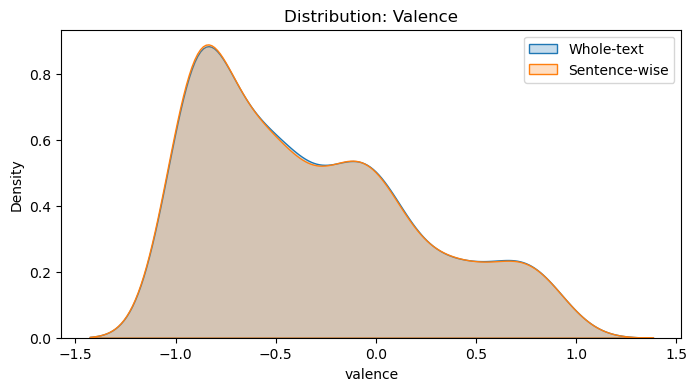

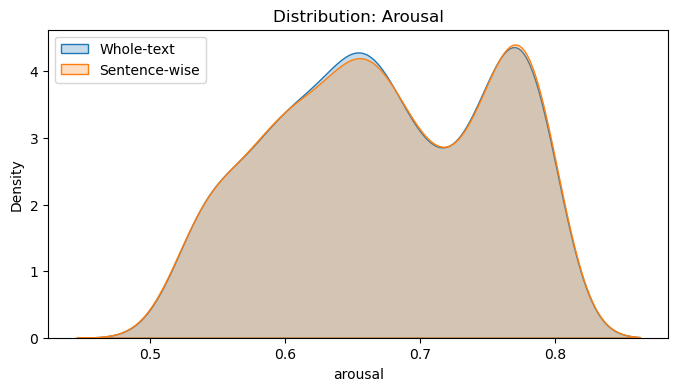

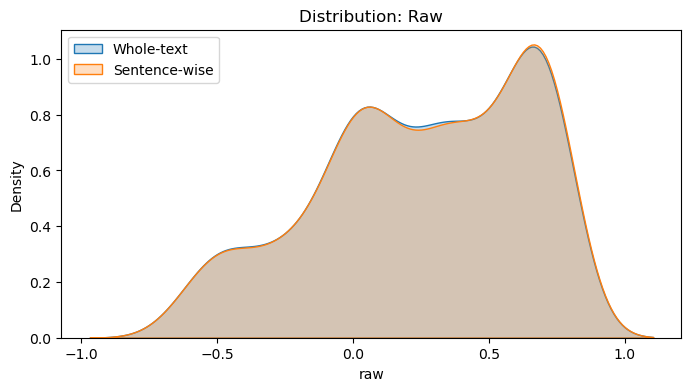

In [25]:
for whole_col, sentence_col in metrics:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[whole_col], label='Whole-text', fill=True)
    sns.kdeplot(df[sentence_col], label='Sentence-wise', fill=True)
    plt.title(f'Distribution: {whole_col.split("_")[0].capitalize()}')
    plt.xlabel(whole_col.split("_")[0])
    plt.ylabel("Density")
    plt.legend()
    plt.show()


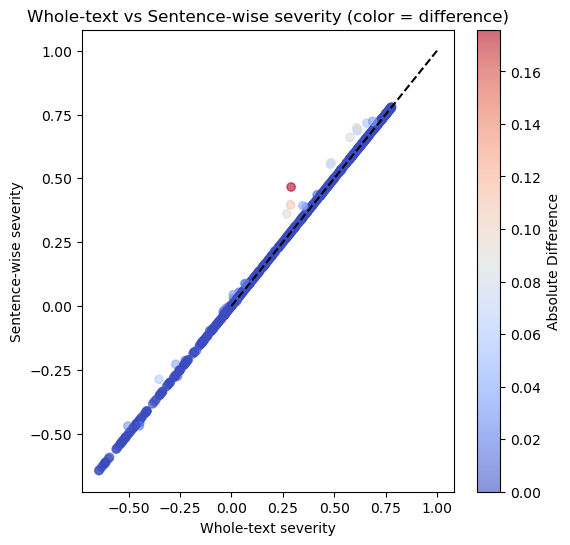

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(df['raw_severity_whole'], df['raw_severity'], 
            c=df['severity_diff'], cmap='coolwarm', alpha=0.6)
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.xlabel("Whole-text severity")
plt.ylabel("Sentence-wise severity")
plt.title("Whole-text vs Sentence-wise severity (color = difference)")
plt.colorbar(label='Absolute Difference')
plt.show()


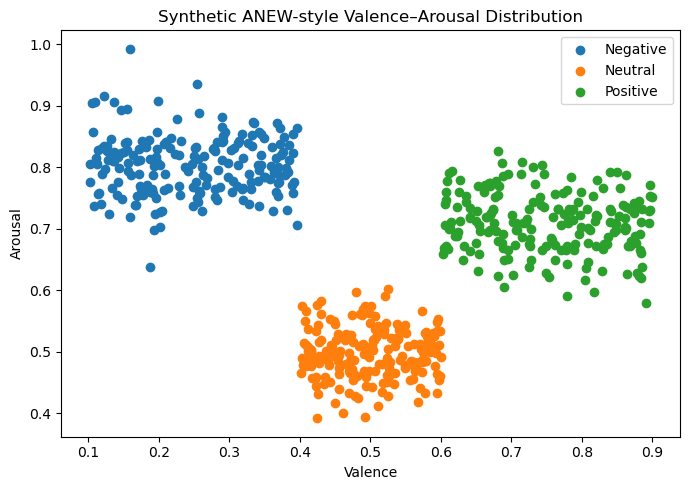

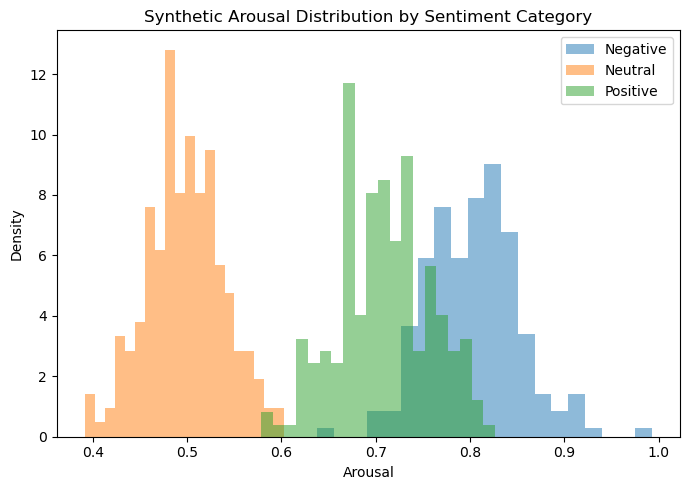

In [1]:
# Generate synthetic ANEW-style data
np.random.seed(42)

# Synthetic clusters
# Negative: low valence (0.1–0.4), high arousal (~0.8)
neg_val = np.random.uniform(0.1, 0.4, 200)
neg_ar = np.random.normal(0.8, 0.05, 200)

# Neutral: mid valence (0.4–0.6), mid arousal (~0.5)
neu_val = np.random.uniform(0.4, 0.6, 200)
neu_ar = np.random.normal(0.5, 0.04, 200)

# Positive: high valence (0.6–0.9), moderate arousal (~0.7)
pos_val = np.random.uniform(0.6, 0.9, 200)
pos_ar = np.random.normal(0.7, 0.05, 200)

# --- Plot A: Valence–Arousal Scatter ---
plt.figure(figsize=(7,5))
plt.scatter(neg_val, neg_ar, label="Negative")
plt.scatter(neu_val, neu_ar, label="Neutral")
plt.scatter(pos_val, pos_ar, label="Positive")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Synthetic ANEW-style Valence–Arousal Distribution")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot B: Arousal Distribution Curve ---
plt.figure(figsize=(7,5))
plt.hist(neg_ar, bins=20, alpha=0.5, label="Negative", density=True)
plt.hist(neu_ar, bins=20, alpha=0.5, label="Neutral", density=True)
plt.hist(pos_ar, bins=20, alpha=0.5, label="Positive", density=True)
plt.xlabel("Arousal")
plt.ylabel("Density")
plt.title("Synthetic Arousal Distribution by Sentiment Category")
plt.legend()
plt.tight_layout()
plt.show()
